### Objective:
Look into how Kenya's food prices such  as maize, rice, beans, fish, and sugar has been changing over the past few years with the aim of finding key patterns if any as to why the increase or decrease in prices.

### About The dataset used
This dataset contains Food Prices data for Kenya. Food prices data comes from the World Food Programme

and covers foods such as maize, rice, beans, fish, and sugar for 76 countries and some 1,500 markets. It

is updated weekly but contains to a large extent monthly data. The data goes back as far as 1992 for a

few countries, although many countries started reporting from 2003 or thereafter.

Methodology - Registry

Source: https://data.humdata.org/dataset/wfp-food-prices-for-kenya
Last updated at https://data.humdata.org/organization/wfp : 2020-05-17

License -
Creative Commons Attribution for Intergovernmental Organisations

Bussines Questions
1. Which are the top food commodities by selling prices.
2. Which market region has the majority share in market prices of commodities.
3. How do the top 10 and bottom 10  food categories compare across the years.
4. How does the selling prices of commodities compare across the months.

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.ticker import ScalarFormatter,MaxNLocator

warnings.filterwarnings('ignore')
pd.options.display.float_format='{:,.2f}'.format


In [ ]:
#load datset
data_link = '/content/wfp_food_prices_ken.csv'
data=pd.read_csv(data_link,skiprows=[1]) #specify skip the second row while we retain the header
#view dataset summary top 5 rows
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,"1,480.00",20.50
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,"3,246.00",44.97
4,2006-01-15,Eastern,Kitui,Kitui,-1.37,38.02,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24


### Eye balling our data
* 1. Check the information concerning our dataset interms of datatypes,dataset size,no. of columns and rows.
* 2. Check the shape of our dataset (rows and columns)
* 3. Check for missing values.
* 4. Check the columns


In [ ]:
#check information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17415 entries, 0 to 17414
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       17415 non-null  object 
 1   admin1     17415 non-null  object 
 2   admin2     17415 non-null  object 
 3   market     17415 non-null  object 
 4   latitude   17415 non-null  float64
 5   longitude  17415 non-null  float64
 6   category   17415 non-null  object 
 7   commodity  17415 non-null  object 
 8   unit       17415 non-null  object 
 9   priceflag  17415 non-null  object 
 10  pricetype  17415 non-null  object 
 11  currency   17415 non-null  object 
 12  price      17415 non-null  float64
 13  usdprice   17415 non-null  float64
dtypes: float64(4), object(10)
memory usage: 1.9+ MB


In [ ]:
#check the shape of our dataset.
data.shape

(17415, 14)

In [ ]:
#check for missing values
data.isna().sum()

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


In [ ]:
#check the column names
data.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

* Looking at our dataset we do not have missing values and our dataset comprises of 17415 rows and 14 columns.
* Our dataset comprises of 4 columns having float datatype and 10 having object data type.
* we shall need to clean our dataset a column like date needs to be in the correct data type (datetime format).



### Data Cleaning

In [ ]:
#convert date column into datetime format
data['date']=pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17415 entries, 0 to 17414
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       17415 non-null  datetime64[ns]
 1   admin1     17415 non-null  object        
 2   admin2     17415 non-null  object        
 3   market     17415 non-null  object        
 4   latitude   17415 non-null  float64       
 5   longitude  17415 non-null  float64       
 6   category   17415 non-null  object        
 7   commodity  17415 non-null  object        
 8   unit       17415 non-null  object        
 9   priceflag  17415 non-null  object        
 10  pricetype  17415 non-null  object        
 11  currency   17415 non-null  object        
 12  price      17415 non-null  float64       
 13  usdprice   17415 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 1.9+ MB


In [ ]:
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,"1,480.00",20.50
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,"3,246.00",44.97
4,2006-01-15,Eastern,Kitui,Kitui,-1.37,38.02,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24


In [ ]:
#Separate text from numeric values under unit column
#extract numerical values - using regular expressions
data['Unit_numerical']=data['unit'].str.extract(r'(\d+(?:\.\d+)?)')[0].astype(float)
data['Unit_numerical']=np.where(data['Unit_numerical'].isna(),1,data['Unit_numerical'])

#extract unit values
data['Unit_values']=data['unit'].str.extract(r'([A-Za-z]+)')

#View our dataset
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Unit_numerical,Unit_values
0,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22,1.00,KG
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,"1,480.00",20.50,90.00,KG
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47,1.00,KG
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,"3,246.00",44.97,90.00,KG
4,2006-01-15,Eastern,Kitui,Kitui,-1.37,38.02,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24,1.00,KG


In [ ]:
#Renaming column names with names that give more meaning
data.rename(columns={'admin1':'region',
                     'admin2':'county',
                    'market':'market_location',
                    'price':'price_KES'},inplace=True)

#viewing our updated dataset
data.head()

,date,region,county,market_location,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price_KES,usdprice,Unit_numerical,Unit_values
0,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22,1.00,KG
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,"1,480.00",20.50,90.00,KG
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47,1.00,KG
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,"3,246.00",44.97,90.00,KG
4,2006-01-15,Eastern,Kitui,Kitui,-1.37,38.02,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24,1.00,KG


year,month,date,day_name,month_name

### Data Engineering
Here we take the data given and come up with new features that we can derive from it such as the date we can obtain  the year,month,date as well as the day_name and month_name

In [ ]:
#Given the date column we can obtain several features such as year,month,month_name
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['month_date']=data['date'].dt.day
data['day_name_num']=(data['date'].dt.weekday+1)/7
data['month_name']=data['date'].dt.month_name()
data['day_name']=data['date'].dt.day_name()
data['day_type']=np.where(data['day_name'].str.lower().isin(['saturday', 'sunday']), 'weekend', 'weekday')
#view updated dataset
data.head()

,date,region,county,market_location,latitude,longitude,category,commodity,unit,priceflag,...,usdprice,Unit_numerical,Unit_values,year,month,month_date,day_name_num,month_name,day_name,day_type
0,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize,KG,actual,...,0.22,1.00,KG,2006,1,15,1.00,January,Sunday,weekend
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,cereals and tubers,Maize (white),90 KG,actual,...,20.50,90.00,KG,2006,1,15,1.00,January,Sunday,weekend
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans,KG,actual,...,0.47,1.00,KG,2006,1,15,1.00,January,Sunday,weekend
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.67,pulses and nuts,Beans (dry),90 KG,actual,...,44.97,90.00,KG,2006,1,15,1.00,January,Sunday,weekend
4,2006-01-15,Eastern,Kitui,Kitui,-1.37,38.02,cereals and tubers,Maize (white),KG,actual,...,0.24,1.00,KG,2006,1,15,1.00,January,Sunday,weekend


In [ ]:
#view unique values from our columns
data['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

In [ ]:
#view unique values from our columns
data['Unit_values'].unique()

array(['KG', 'G', 'ML', 'L', 'Unit', 'Bunch', 'Head'], dtype=object)

In [ ]:
#view unique values from our columns
data['priceflag'].unique()

array(['actual', 'aggregate'], dtype=object)

In [ ]:
#Create dictionary data types that we shall use to map on the specified columns creating numerical values
#This comes in handy when we want to do modelling
data_labels_price={'Wholesale':1,'Retail':0}
data_labels_priceflag={'actual':1,'aggregate':0}
data_labels_unitval={'KG':1,'G':2, 'ML':3, 'L':3, 'Unit':4, 'Bunch':5, 'Head':6}
data_labels_regn={'Coast':1, 'Eastern':2, 'Nairobi':3, 'North Eastern':4, 'Nyanza':5,
       'Rift Valley':6, 'Central':7}

data['pricetype_labels']=data['pricetype'].map(data_labels_price)
data['priceflag_labels']=data['priceflag'].map(data_labels_priceflag)
data['Unit_values_labels']=data['Unit_values'].map(data_labels_unitval)
data['region_values_labels']=data['region'].map(data_labels_regn)

#view dataset
data.head().T

,0,1,2,3,4
date,2006-01-15 00:00:00,2006-01-15 00:00:00,2006-01-15 00:00:00,2006-01-15 00:00:00,2006-01-15 00:00:00
region,Coast,Coast,Coast,Coast,Eastern
county,Mombasa,Mombasa,Mombasa,Mombasa,Kitui
market_location,Mombasa,Mombasa,Mombasa,Mombasa,Kitui
latitude,-4.05,-4.05,-4.05,-4.05,-1.37
longitude,39.67,39.67,39.67,39.67,38.02
category,cereals and tubers,cereals and tubers,pulses and nuts,pulses and nuts,cereals and tubers
commodity,Maize,Maize (white),Beans,Beans (dry),Maize (white)
unit,KG,90 KG,KG,90 KG,KG
priceflag,actual,actual,actual,actual,actual


### Exploratory Data Analytics.
Here using our dataset we want to perform descriptive analytics where we look into:

1> Central measure of tendancy - Mean,Mode,Median

2> Measure of variality (measure of spread)= Standard deviation,range,IQR

3> Measure of shape

                    - kurtosis - tailedness of the data

                     skewness  - measures of symmetry

In [ ]:
#We define a function to help us calculate the decriptive measures from our numerical values
def descriptive_stats(df):

    #select columns with numerical data types
    numerical_cols=data.select_dtypes(['float','int']).columns

    stats_data={} #create empty dictionary to store our statistics from various columns

    for col in numerical_cols:
        variance=np.var(data[col])
        std_dev=np.std(data[col])
        mean=np.mean(data[col])
        median=np.median(data[col])
        perce_75=np.percentile(data[col],75)
        perce_25=np.percentile(data[col],25)
        iqr=perce_75-perce_25
        max_val=np.max(data[col])
        min_val=np.min(data[col])
        range_val=max_val-min_val
        skewness=data[col].skew()
        kurtosis=data[col].kurtosis()

        stats_data[col]={
                          'Variance':variance,
                          'STANDARD_DEVIATION':std_dev,
                          'MEAN':mean,
                          'MEDIAN':median,
                          'PERCENTILE_25':perce_25,
                          'PERCENTILE_75':perce_75,
                          'IQR':iqr,
                          'MAX':max_val,
                          'MIN':min_val,
                          'RANGE':range_val,
                          'SKWENESS':skewness,
                          'KURTOSIS':kurtosis
                         }

    stats_data=pd.DataFrame(stats_data)

    return stats_data

In [ ]:
#view our statistical dataset
descriptive_stats(data)

,latitude,longitude,price_KES,usdprice,Unit_numerical,year,month,month_date,day_name_num,pricetype_labels,priceflag_labels,Unit_values_labels,region_values_labels
Variance,5.00,3.65,"9,129,086.54",720.23,"10,820.71",23.68,11.54,0.00,0.08,0.25,0.23,0.58,3.15
STANDARD_DEVIATION,2.24,1.91,"3,021.44",26.84,104.02,4.87,3.40,0.00,0.28,0.50,0.48,0.76,1.78
MEAN,0.13,36.87,"1,947.34",18.08,59.97,"2,018.78",6.09,15.00,0.54,0.51,0.63,1.30,4.22
MEDIAN,-0.10,36.79,193.53,1.66,1.00,"2,021.00",6.00,15.00,0.57,1.00,1.00,1.00,4.00
PERCENTILE_25,-1.28,35.08,62.00,0.60,1.00,"2,016.00",3.00,15.00,0.29,0.00,0.00,1.00,3.00
PERCENTILE_75,1.25,38.02,"2,907.00",28.27,90.00,"2,022.00",9.00,15.00,0.86,1.00,1.00,1.00,6.00
IQR,2.54,2.94,"2,845.01",27.68,89.00,6.00,6.00,0.00,0.57,1.00,1.00,0.00,3.00
MAX,3.94,41.86,"19,800.00",183.81,500.00,"2,024.00",12.00,15.00,1.00,1.00,1.00,6.00,7.00
MIN,-4.66,34.73,5.00,0.04,1.00,"2,006.00",1.00,15.00,0.14,0.00,0.00,1.00,1.00
RANGE,8.60,7.13,"19,795.00",183.76,499.00,18.00,11.00,0.00,0.86,1.00,1.00,5.00,6.00


#### Find the top 10  mean average price of the   commodities

In [ ]:
data.groupby(['commodity','Unit_numerical','Unit_values'])['price_KES'].mean().sort_values(ascending=False)[:10]

,,,price_KES
commodity,Unit_numerical,Unit_values,
Beans (yellow),90.00,KG,"10,723.59"
Beans (dolichos),90.00,KG,"10,346.06"
Beans (mung),90.00,KG,"9,872.07"
Beans (rosecoco),90.00,KG,"9,121.23"
Cowpeas,90.00,KG,"8,627.23"
Millet (finger),90.00,KG,"7,701.52"
Beans (kidney),90.00,KG,"7,337.41"
Rice (aromatic),50.00,KG,"6,925.35"
Sorghum (white),90.00,KG,"5,884.08"


Looking at the commodities  average prices we find that the highest prices come from Yellow Beans followed by Dolichos Beans with mean prices above KES10,000,Mung Beans and rosecoco Beans with mean prices above KES 9000 but less than KES 10,000.

Cowpeas ,finger millet , kidney Beans have fetch average prices of KES 8627.22,7701.52,7337.41 and 7337.41 respectively.Aromatic rice ,white sorghum ,Dry Beans complete the top 10 commodities by their average selling prices.

#### Find the Bottom 10 mean average price of the commodities

In [ ]:
data.groupby(['commodity','Unit_numerical','Unit_values'])['price_KES'].mean().sort_values(ascending=False)[-10:]

,,,price_KES
commodity,Unit_numerical,Unit_values,
Maize (white),1.00,KG,48.53
Bread,400.00,G,40.57
Maize,1.00,KG,38.64
"Milk (cow, pasteurized)",500.00,ML,37.18
Cowpea leaves,1.00,KG,31.26
Spinach,1.00,KG,29.11
Milk (UHT),200.00,ML,27.00
Kale,1.00,Bunch,14.38
Bananas,1.00,Unit,12.83


When we observe the commodities with the least average selling prices in the markets we find that the least is 200grams of salt sold at KES followed by a unit of Bananas going for KES 12.83 ,a bunch of kales follow going for KES14.38 this form the bottom 3 commodities with the least prices.

(UHT) and (cow,pasteurized) Milk are being sold for KESH27 and KES 37 for 200ML and 500ML respectively.

The prices of the bottom 10 commodities in average prices range between KES 11 and KES 48 their mean prices are below KES 50 and below the US Dollar.

#### Top 10 Food Categories by Selling prices by Year

In [ ]:
data.groupby(['unit','category','year'])['price_KES'].sum().sort_values(ascending=False)[:10]

unit   category            year
90 KG  pulses and nuts     2021   4,921,565.75
                           2022   4,121,101.79
                           2023   2,422,539.61
       cereals and tubers  2021   1,622,879.50
50 KG  cereals and tubers  2022   1,186,334.49
                           2021     998,322.67
90 KG  cereals and tubers  2022     891,107.73
50 KG  cereals and tubers  2023     748,552.94
90 KG  pulses and nuts     2024     661,455.00
       cereals and tubers  2023     641,777.36
Name: price_KES, dtype: float64

Pulses and nuts fetched the highest prices in the years 2021 an 2022 and again in 2023 with total selling  prices fetching  4,921,565.75 and 4,121,101.79 and 2,422,539.61 for 90KG bags across the year. This was followed by 90KG bags of cereals and tubers in 2021 then 50KG bags   in 2022 and twice in 2021  fetching at and 2017 with prices going for 2,723,855.32,2,089,925.55,1,447,622.19 and 698,943.13 .

Vegetables and fruits fetched the highest prices in the year 2021 at KES 1,622,879.50,in the year 2022 for a 9O KG bag the then KES 1,186,334.49  and KES 998,322.67 for 50KG bags in the year 2022 and 2021 respectively. The prices for food under cereal and tubers category 90KG bag in 2022 was low compared to 2023 selling at a total of KES 891,107.73 followed by 50KG bag that in 2023 was selling at a total of KES 748,552.94 across the markets the least prices in the top ten was from cereal and tubers 90KG bags that in 2023 fetched for a total selling price of KES 641,777.36.

90KG bag of pulses and nuts reduced significantly in 2024 with the total prices fetching for 661,455.00 .



#### Top 10 Martket Location  by Average prices by Year and Month

In [ ]:
data.groupby(['market_location','year','month_name'])['price_KES'].mean().sort_values(ascending=False)[:10]

market_location                year  month_name
Lomut (West Pokot)             2021  January      10,800.00
Kangemi (Nairobi)              2023  April         9,873.32
                                     October       9,084.00
Tala Centre Market (Machakos)  2022  July          8,955.00
Kangemi (Nairobi)              2023  December      8,473.50
Wakulima (Nakuru)              2024  March         8,404.75
Takaba (Mandera)               2023  June          8,027.67
Kangemi (Nairobi)              2023  March         7,977.10
Kibuye (Kisumu)                2022  November      7,842.71
Wakulima (Nakuru)              2024  June          7,764.80
Name: price_KES, dtype: float64

Getting to view the average prices in comparison to the market_location by month and year we find that Lomut market in west_pokot had the highest average prices of food commodities  for the year 2021 in the month of January.

Kangemi market in Nairobi followed for the year 2023 in April with prices fetching at 9,873.32 and 9,084.00 in october same year again in 2023 with prices at KES 8,473.50 December and KES 7,977.10  in 2023 March. Tala centre market in Machakos saw average prices of commodities at KES 8,955.00 in 2022 July.

In 2024 wakulima market in Nakuru saw average prices of commodities at KES 8,404.75 for the month of March and then again in June same year at KES 7,764.80. Takaba (Mandera) saw average prices of commodities at KES 8,027.67 in 2023 June . Kibuye market in Kisumu saw average prices of commodities at KES 7,842.71 in 2022 November

#### Total Selling Price of commodities by Year and Month

In [ ]:
#Getting the Total Selling Price of commodities by Year and Month Across several market locations in Kenya.
pd.pivot_table(data=data,
               columns='year',
               index=['market_location','unit','commodity','month_name'],
               values='price_KES',
               aggfunc='sum',
               margins_name='Total').sort_values(by=2024,ascending=False)[:10]

year                                                          2006  2007  \
market_location            unit  commodity        month_name               
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   February     NaN   NaN   
                                                  March        NaN   NaN   
                                                  June         NaN   NaN   
                                                  May          NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) February     NaN   NaN   
                                                  January      NaN   NaN   
                                                  March        NaN   NaN   
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   July         NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) June         NaN   NaN   
                                                  May          NaN   NaN   

year                                                          2008  2009  \
market_location            unit  commodity        month_name               
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   February     NaN   NaN   
                                                  March        NaN   NaN   
                                                  June         NaN   NaN   
                                                  May          NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) February     NaN   NaN   
                                                  January      NaN   NaN   
                                                  March        NaN   NaN   
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   July         NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) June         NaN   NaN   
                                                  May          NaN   NaN   

year                                                          2010  2011  \
market_location            unit  commodity        month_name               
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   February     NaN   NaN   
                                                  March        NaN   NaN   
                                                  June         NaN   NaN   
                                                  May          NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) February     NaN   NaN   
                                                  January      NaN   NaN   
                                                  March        NaN   NaN   
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   July         NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) June         NaN   NaN   
                                                  May          NaN   NaN   

year                                                          2012  2013  \
market_location            unit  commodity        month_name               
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   February     NaN   NaN   
                                                  March        NaN   NaN   
                                                  June         NaN   NaN   
                                                  May          NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) February     NaN   NaN   
                                                  January      NaN   NaN   
                                                  March        NaN   NaN   
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   July         NaN   NaN   
Wakulima (Nakuru)          90 KG Beans (dolichos) June         NaN   NaN   
                                                  May          NaN   NaN   

year                                                          2014  2015  \
market_location            unit  commodity        month_name               
Eldoret town (Uasin Gishu) 90 KG Beans (yellow)   February     NaN   NaN   
                                                  March        NaN   NaN   
                                            

Looking at the total selling prices across the years ordering by the recent year(2024) we find that commodities  prices have mainly been from a variety of Beans that seem to fetch high prices we also have cowpeas and aromatic rice and white sorghum

Worth noting is that IN 2021 Beans varieties appear to be lower in selling prices from Wakulima Market in Nakuru.

### Visualization

In [ ]:
#view the dataset
data.head().T

,0,1,2,3,4
date,2006-01-15 00:00:00,2006-01-15 00:00:00,2006-01-15 00:00:00,2006-01-15 00:00:00,2006-01-15 00:00:00
region,Coast,Coast,Coast,Coast,Eastern
county,Mombasa,Mombasa,Mombasa,Mombasa,Kitui
market_location,Mombasa,Mombasa,Mombasa,Mombasa,Kitui
latitude,-4.05,-4.05,-4.05,-4.05,-1.37
longitude,39.67,39.67,39.67,39.67,38.02
category,cereals and tubers,cereals and tubers,pulses and nuts,pulses and nuts,cereals and tubers
commodity,Maize,Maize (white),Beans,Beans (dry),Maize (white)
unit,KG,90 KG,KG,90 KG,KG
priceflag,actual,actual,actual,actual,actual


<Figure size 500x500 with 0 Axes>

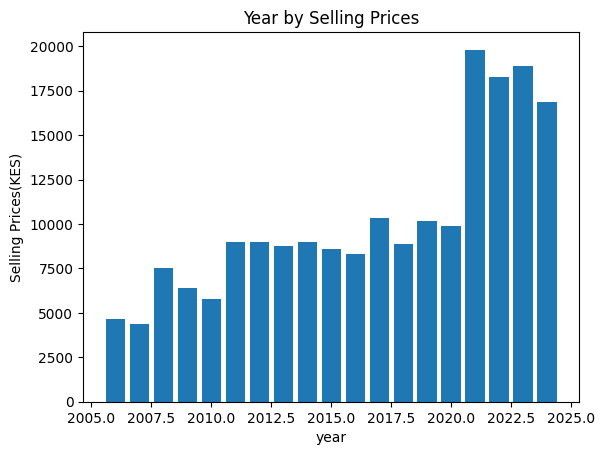

In [ ]:
#plotting a bar graph year by selling prices
plt.figure(figsize=(5,5))
fig,ax=plt.subplots()
ax.bar(data=data,x=round(data['year'],0),height=data['price_KES'])
ax.set_title('Year by Selling Prices')
ax.set_xlabel('year')
ax.set_ylabel('Selling Prices(KES)')
plt.show()

<Figure size 1000x500 with 0 Axes>

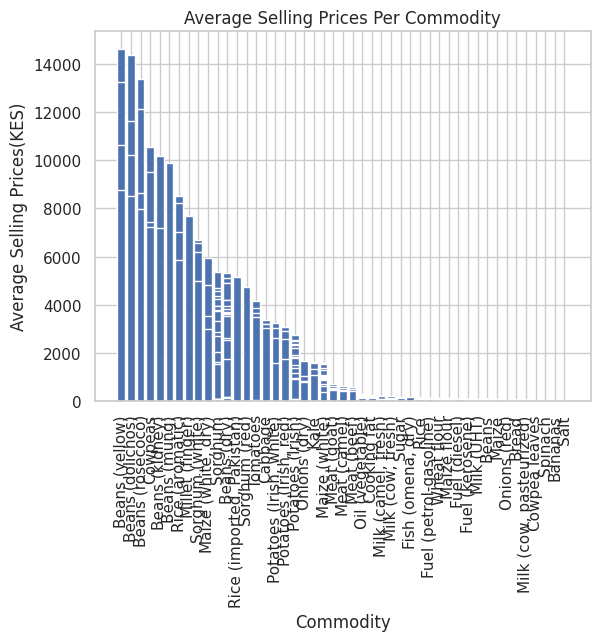

In [ ]:
#plotting a bar graph Average Selling Prices per commodity by selling prices
data_food_prices=data.groupby(['commodity','year'])['price_KES'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
fig,ax=plt.subplots()
ax.bar(data=data_food_prices,x='commodity',height='price_KES')
ax.set_title('Average Selling Prices Per Commodity')
ax.set_xlabel('Commodity')
ax.set_ylabel("Average Selling Prices(KES)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_markets=data[['market_location','category','Unit_numerical','Unit_values','commodity','price_KES','year','month_name','day_name','day_type']]
data_markets.head()



,market_location,category,Unit_numerical,Unit_values,commodity,price_KES,year,month_name,day_name,day_type
0,Mombasa,cereals and tubers,1.00,KG,Maize,16.13,2006,January,Sunday,weekend
1,Mombasa,cereals and tubers,90.00,KG,Maize (white),"1,480.00",2006,January,Sunday,weekend
2,Mombasa,pulses and nuts,1.00,KG,Beans,33.63,2006,January,Sunday,weekend
3,Mombasa,pulses and nuts,90.00,KG,Beans (dry),"3,246.00",2006,January,Sunday,weekend
4,Kitui,cereals and tubers,1.00,KG,Maize (white),17.00,2006,January,Sunday,weekend


<Figure size 1000x500 with 0 Axes>

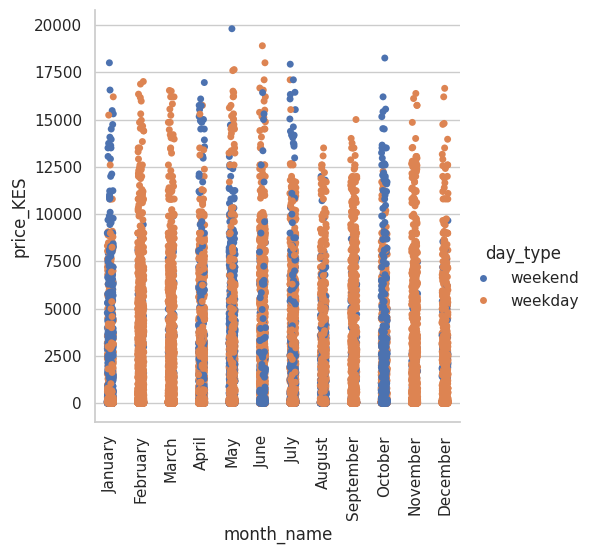

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='month_name',y='price_KES',hue='day_type',data=data_markets)
plt.xticks(rotation=90)
plt.show();

For each month, the plot shows how prices differ between weekends and weekdays.

Weekday prices (orange) appear more clustered in the lower price ranges compared to weekend prices (blue), which may be more spread out, especially in months like May and June.

In general, it seems that weekend prices are higher than weekday prices, especially in some months, although there’s a mix of both high and low prices across the months.

There might be more variability in the prices on weekends compared to weekdays during the month of  October, with weekends potentially experiencing higher prices more frequently than weekdays. This pattern could indicate a demand surge or special pricing strategies in place for weekends during this month.

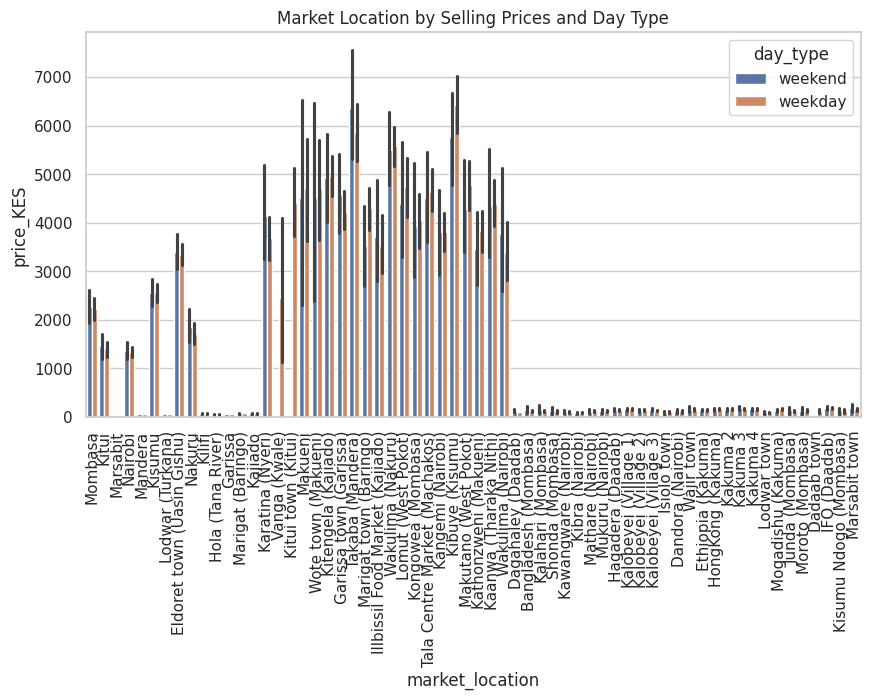

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_markets,x=data_markets['market_location'],y=data['price_KES'],hue=data['day_type'])
plt.title('Market Location by Selling Prices and Day Type')
plt.xticks(rotation=90)
plt.show();

In general the commodity prices are higher on weekends in most market locations but few market locations such as Kitui town(kitui) does not have selling prices on weekends,kibuye(kisumu) market has more selling prices on weekdays compared to weekends.

This shows that generally on weekdays is when the markets are busy with most selling prices of commodities fetching higher prices than on weekends.

#### Q1. Which are the top food commodities by selling prices.
#### Top 10 food commodities by selling prices

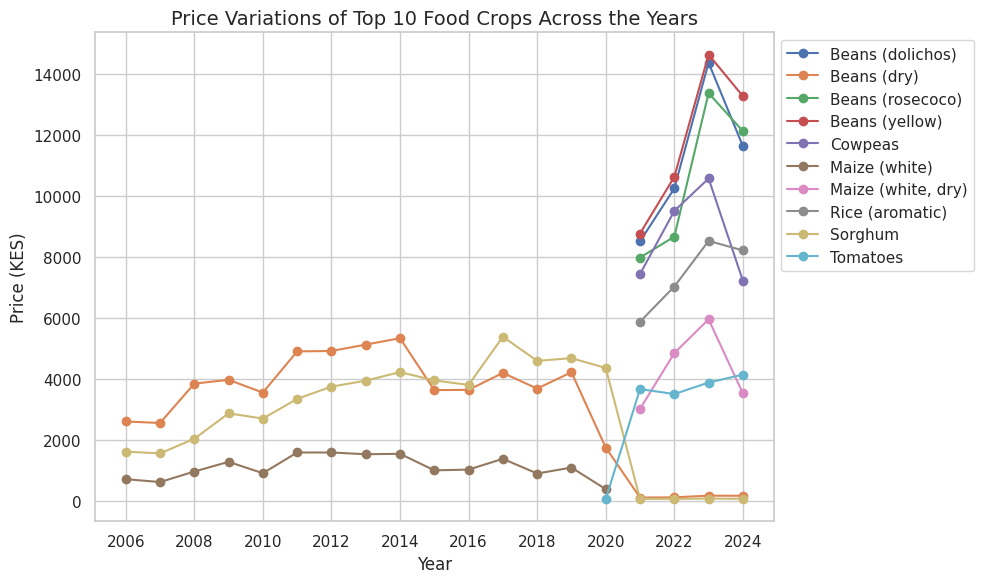

In [ ]:
comodities=data.groupby('commodity')['price_KES'].sum()

#Get the top 10 crops by total price
top_10_comodities = comodities.nlargest(10).index

#  Filter the original DataFrame to include only the top 10 crops
df_top_10 = data[data['commodity'].isin(top_10_comodities)]
# Group by both 'commodity' and 'year', and take the mean price (to handle duplicates)
df_top_10_grouped = df_top_10.groupby(['commodity', 'year'])['price_KES'].mean().reset_index()

# Pivot the data to ave each commodity have its own column
df_pivot = df_top_10_grouped.pivot(index='year', columns='commodity', values='price_KES')

# Sort the years for proper plotting order
df_pivot = df_pivot.sort_index()

#  Plot the data for top 10 crops
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot each commodity as a line
for commodity in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[commodity], marker='o', label=commodity)

# Add titles and labels
plt.title('Price Variations of Top 10 Food Crops Across the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (KES)', fontsize=12)

# Remove exponential notation by setting ScalarFormatter on y-axis
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Ensure plain formatting on the y-axis

# Set x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Place the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()



#### Q2. Which market region has the majority share in market prices of commodities

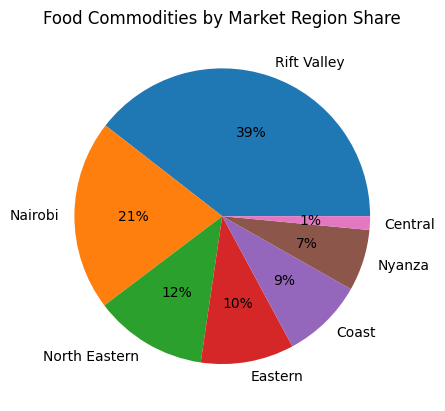

In [ ]:
#plotting Market Region per the food commodities selling prices to which has more contribution
data_region=data['region'].value_counts()
region_labels=data['region'].value_counts().index
plt.pie(data_region,labels=region_labels,autopct='%.0f%%')
plt.title("Food Commodities by Market Region Share")
plt.show()

When we look at the share of food commodities prices by market region we find that most come from Rift Valley at 39% followed by Nairobi, then North Eastern at 12% then Eastern at 10% . Coast ,Nyanza and Central have 9%,7%,1% respectively.

Here we see riftvalley has alot of markets compared to central hence the percentages of food comodities being sold in these regions.

* Beans (dolichos, rosecoco, and yellow):

  These types of beans experienced stable prices from 2006 to around 2020.
  After 2021, their prices shot up dramatically, peaking in 2023 at over 14,000 KES, and then slightly dropped in 2024.

* Beans (dry):

   The price for dry beans steadily increased over time without major spikes.
   It reached around 6,000 KES by 2023 and remained relatively stable compared to other beans.

* Cowpeas:

  Cowpeas showed a gradual rise in price, staying relatively low compared to other crops.
  There was a slight increase after 2021, but prices remained much lower than beans or maize.

* Maize (white and white, dry):

  White maize prices remained quite stable from 2006 to 2020.
  After 2021, both white and white dry maize prices rose significantly, peaking in 2023 (around 10,000 KES for white maize).

* Rice (aromatic):

  The price of rice increased steadily from 2006 to 2023, reaching around 9,000 KES.
  It showed a slight drop in 2024.

* Sorghum:

   Sorghum prices were quite stable and low compared to other crops.
   A slight increase is visible after 2021 but remains well below 6,000 KES.

* Tomatoes:

   Tomato prices stayed fairly low and stable throughout the period, with only slight increases.

Prices were fairly stable from 2006 to 2020.
After 2021, a sharp rise occurred for most crops, especially various types of beans and maize.

Worth noting is in 2022 it was an election year in Kenya also with the new governament coming in fuel subsidies were removed causing fuel prices to go up resulting in increase of transportation costs affecting food commodities prices.

#### Q3.How do the  bottom 10 food categories compare across the years.
#### Bottom 10 food crops by selling prices overtime.

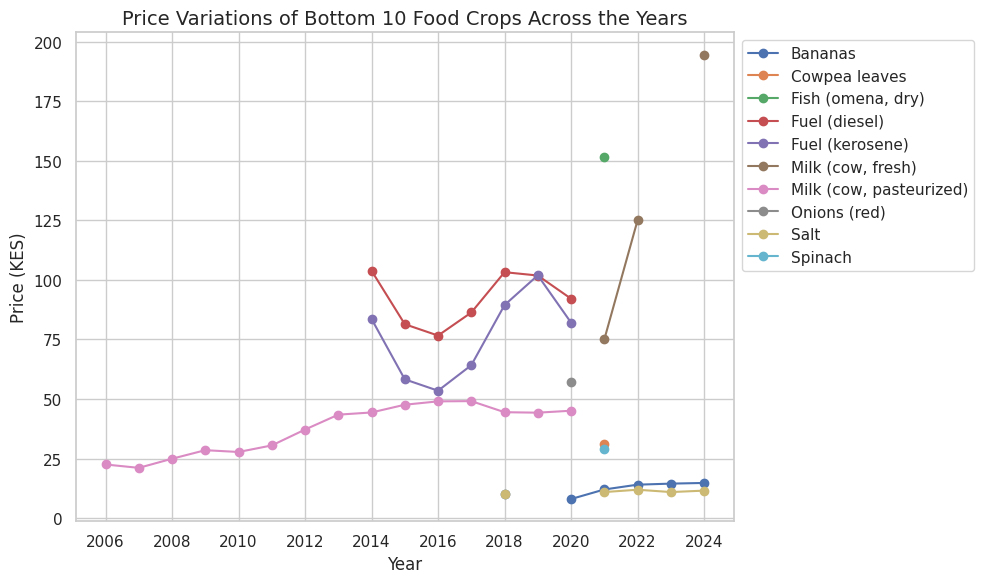

In [ ]:
comodities=data.groupby('commodity')['price_KES'].sum()

#Get the top 10 crops by total price
bottom_10_comodities = comodities.nsmallest(10).index

#  Filter the original DataFrame to include only the top 10 crops
df_bottom_10 = data[data['commodity'].isin(bottom_10_comodities)]
# Group by both 'commodity' and 'year', and take the mean price (to handle duplicates)
df_bottom_10_grouped = df_bottom_10.groupby(['commodity', 'year'])['price_KES'].mean().reset_index()

# Pivot the data to ave each commodity have its own column
bottom_df_pivot = df_bottom_10_grouped.pivot(index='year', columns='commodity', values='price_KES')

# Sort the years for proper plotting order
bottom_df_pivot = bottom_df_pivot.sort_index()

#  Plot the data for top 10 crops
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot each commodity as a line
for commodity in bottom_df_pivot.columns:
    plt.plot(bottom_df_pivot.index, bottom_df_pivot[commodity], marker='o', label=commodity)

# Add titles and labels
plt.title('Price Variations of Bottom 10 Food Crops Across the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (KES)', fontsize=12)

# Remove exponential notation by setting ScalarFormatter on y-axis
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Ensure plain formatting on the y-axis

# Set x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Place the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()

* Bananas:

  The price of bananas remained low and stable across all years, with no major changes.

* Cowpea leaves:

  Cowpea leaves saw a slight increase in price but remained low, hovering around 50 KES in recent years.

* Fish (omena, dry):

  The price of dry fish increased significantly between 2012 and 2015, peaking at around 100 KES. It then dropped and remained stable afterward.

* Fuel (diesel and kerosene):

  The price of diesel (red line) increased until around 2015, reaching over 100 KES, then fluctuated but stayed relatively high.
  The price of kerosene (purple line) also peaked around 2014, dropped, and then slightly increased again after 2016 but remained below 100 KES.

* Milk (cow, fresh and pasteurized):

  Fresh milk (brown line) stayed relatively stable but saw a notable jump after 2021, rising to over 150 KES by 2024.
  Pasteurized milk (pink line) gradually increased over the years, rising from about 20 KES in 2006 to over 75 KES by 2024.

* Onions (red):

  The price of red onions has been mostly stable, with small fluctuations, staying under 50 KES.

* Salt:

  Salt prices have remained almost flat and very low, below 10 KES throughout all the years.

* Spinach:

  Spinach prices stayed quite stable and low, with minor increases, and remained below 20 KES in recent years.

  Most food items like spinach, salt, and onions stayed low and stable in price throughout the years.Fresh milk saw a sharp increase in price after 2021.

#### Food Categories  Selling Prices in relation to Day Type of  the Week

Text(0.5, 1.0, ' Food Categories  Selling Prices in relation to Day Type of  the Week')

<Figure size 1000x500 with 0 Axes>

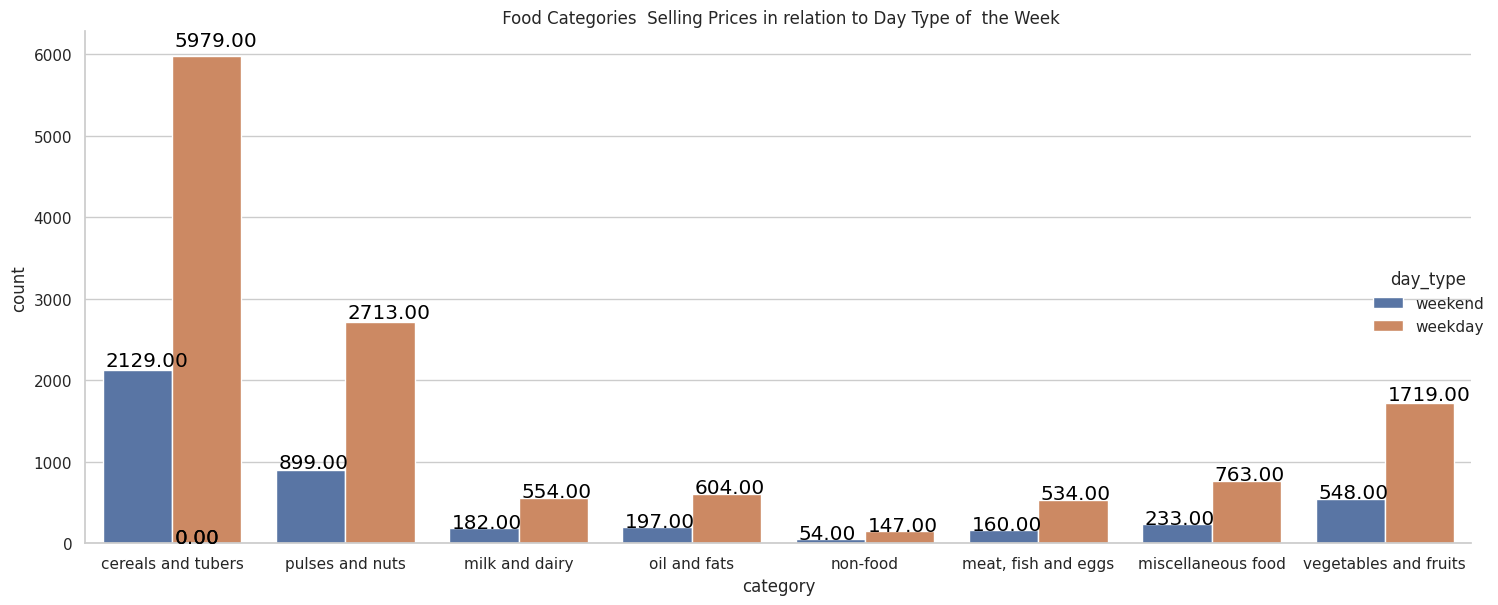

In [ ]:
#create a catplot t show the count of food categories sold by day type
plt.figure(figsize=(10,5))
f=sns.catplot(data=data,x='category',kind='count',hue='day_type', height=6, aspect=2.3)
# Get the axis of the plot so we can manipulate it later
ax= f.facet_axis(0,0)
#label each column bar with it's exact count
#go through each bar (patch)
for p in ax.patches:
    #get the x-position of the bar and add a little bit to center the text
    x_position=p.get_x()+0.015
    #get the height of the bar - we multiply by 1.02 to get the text slight above the bar
    y_position=p.get_height()*1.02
    #format the height value as a whole number  and display it on the plot
    ax.text(x_position,y_position,'{0:.2f}'.format(p.get_height()),color='black',rotation='horizontal',size='large')#display the count in each bar
# Adjust layout to fit the legend
plt.tight_layout()
plt.title(" Food Categories  Selling Prices in relation to Day Type of  the Week")

Most of the food commodities fetch high prices on weekdays compared to the weekends across the several markets.

This could also mean most markets are busy mostly during weekdays with cereals and tubers  leading in both selling prices across the years followed by pulses abd nuts,then vegetables and fruits.

The least prices come from non-food commodities.

#### Plotting the distrubution of the selling prices

Text(0, 0.5, 'Frequency')

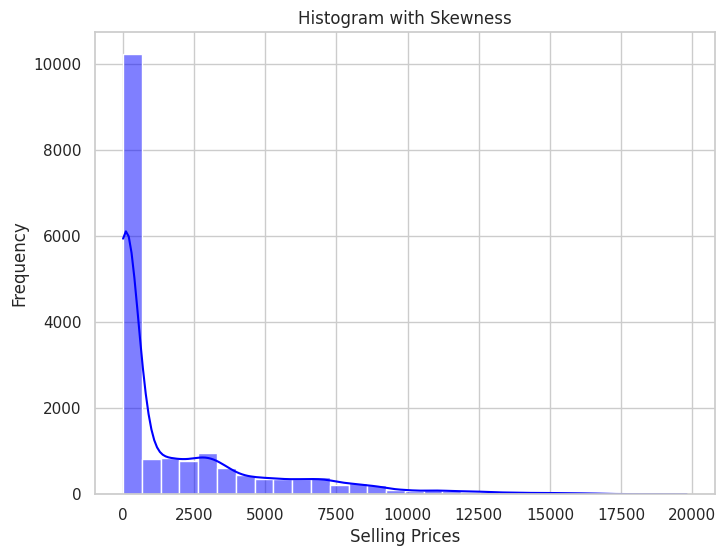

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price_KES'], kde=True, color='blue', bins=30)
plt.title('Histogram with Skewness')
plt.xlabel('Selling Prices')
plt.ylabel('Frequency')

This shows the selling prices do not have a normal symmetry

* A skewness value > 0 indicates a right-skewed (positive skew) distribution.
* A skewness value < 0 indicates a left-skewed (negative skew) distribution.

#### Q4.How does the selling prices of commodities compare across the months

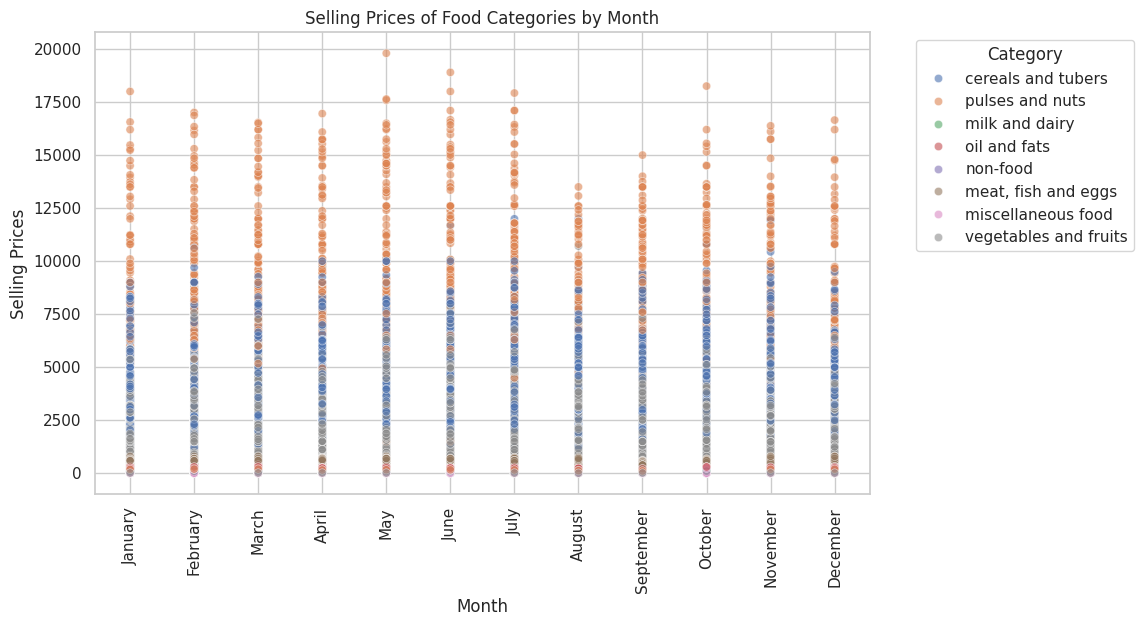

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['month_name'],y=data['price_KES'],hue=data['category'],color='blue',alpha=0.6, edgecolors='w')
plt.title('Selling Prices of Food Categories by Month')
plt.xlabel('Month')
plt.ylabel('Selling Prices')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

Comparing the prices of food commodities across the months we find that pulses and nuts category fetch higher prices above KES 10,000 across the months while cereals and tubers prices majorly fetch between KES 2,500 - KES 7,500 .

Vegetable and fruits are the commodities that fetch the least selling prices being below KES 2500

#### Summary:
* Having a look at the data we find that the food commodities that fetch high prices are from the pulses and nuts categories this is followed by vegetable and fruits then cereals and tuber forming the top three.

*  Rift valley has the most markets a total of 40 which give the region the highest total selling prices from the markets in this region central region has the least in markets count having one market.

* During weekends the selling prices of commodities are higher that weekdays from the top 10 commodities by selling prices while the bottom 10 weekdays and weekends tend to share the prices for some products.

* Most food items like spinach, salt, and onions stayed low and stable in price throughout the years. Fresh milk saw a sharp increase in price after 2021.


In [ ]:
#saving the cleaned and feature engineered dataset
data.to_csv('data_food_prices.csv')